In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [2]:
path = r"C:\Users\R\Desktop\MASAI\PROJECT\P2_Car price prediction model\final-csvs\*.csv"

In [3]:
csv_files = glob.glob(path)

In [4]:
datasets = []

for file in csv_files:
    df = pd.read_csv(file, index_col=0)
    datasets.append(df)

In [5]:
df = pd.concat(datasets, axis=0, ignore_index=True)
df

,brand_and_model,km_driven,fuel_type,transmission,all_spec_1,all_spec_2,price
0,2019 Tata Harrier XZ,38K km,· Diesel,· Manual,NaN,Mileage (ARAI)\n17 kmpl\nGround clearance\n205...,₹15.65 Lakh
1,2019 Maruti Suzuki Baleno Zeta Petrol,25K km,· Petrol,· Manual,NaN,Mileage (ARAI)\n21.01 kmpl\nGround clearance\n...,₹7.85 Lakh
2,2021 Mahindra XUV 300 W6 AMT Diesel,51K km,· Diesel,· Automatic,NaN,Mileage (ARAI)\n20 kmpl\nGround clearance\n180...,₹11.41 Lakh
3,2019 Tata Nexon XZA Plus AMT Diesel,54K km,· Diesel,· Automatic,Mileage (ARAI)\n21.5 kmpl\nBoot space\n350 lit...,NaN,₹9.64 Lakh
4,2019 Ford Freestyle Titanium 1.2,18K km,· Petrol,· Manual,NaN,Mileage (ARAI)\n18.5 kmpl\nBoot space\n257 lit...,₹6.57 Lakh
...,...,...,...,...,...,...,...
1936,2021 Hyundai Venue SX 1.0 Turbo iMT,12K km,· Petrol,· Manual,Mileage (ARAI)\n18 kmpl\nGround clearance\n195...,NaN,₹10.23 Lakh
1937,2021 Skoda Kushaq Ambition 1.0L TSI AT,11K km,· Petrol,· Automatic,NaN,Mileage (ARAI)\n17.2 kmpl\nGround clearance\n1...,₹13.53 Lakh
1938,2020 Maruti Suzuki S-Presso VXI Opt CNG,81K km,· Petrol+cng,· Manual,NaN,Mileage (ARAI)\n31.19 kmpl\nGround clearance\n...,₹4 Lakh
1939,2021 Tata Safari XZ Plus,36K km,· Diesel,· Manual,NaN,Mileage (ARAI)\n16.14 kmpl\nGround clearance\n...,₹19.14 Lakh


In [6]:
df.isnull().sum()

brand_and_model       0
km_driven            12
fuel_type             0
transmission          0
all_spec_1         1042
all_spec_2          916
price                 0
dtype: int64

# MERGING ALL SPECIFICATIONS IN SINGLE COLUMN

In [7]:
df['all_spec_1'] = np.where(df['all_spec_1'].isnull(), df['all_spec_2'], df['all_spec_1'])

In [8]:
df

,brand_and_model,km_driven,fuel_type,transmission,all_spec_1,all_spec_2,price
0,2019 Tata Harrier XZ,38K km,· Diesel,· Manual,Mileage (ARAI)\n17 kmpl\nGround clearance\n205...,Mileage (ARAI)\n17 kmpl\nGround clearance\n205...,₹15.65 Lakh
1,2019 Maruti Suzuki Baleno Zeta Petrol,25K km,· Petrol,· Manual,Mileage (ARAI)\n21.01 kmpl\nGround clearance\n...,Mileage (ARAI)\n21.01 kmpl\nGround clearance\n...,₹7.85 Lakh
2,2021 Mahindra XUV 300 W6 AMT Diesel,51K km,· Diesel,· Automatic,Mileage (ARAI)\n20 kmpl\nGround clearance\n180...,Mileage (ARAI)\n20 kmpl\nGround clearance\n180...,₹11.41 Lakh
3,2019 Tata Nexon XZA Plus AMT Diesel,54K km,· Diesel,· Automatic,Mileage (ARAI)\n21.5 kmpl\nBoot space\n350 lit...,NaN,₹9.64 Lakh
4,2019 Ford Freestyle Titanium 1.2,18K km,· Petrol,· Manual,Mileage (ARAI)\n18.5 kmpl\nBoot space\n257 lit...,Mileage (ARAI)\n18.5 kmpl\nBoot space\n257 lit...,₹6.57 Lakh
...,...,...,...,...,...,...,...
1936,2021 Hyundai Venue SX 1.0 Turbo iMT,12K km,· Petrol,· Manual,Mileage (ARAI)\n18 kmpl\nGround clearance\n195...,NaN,₹10.23 Lakh
1937,2021 Skoda Kushaq Ambition 1.0L TSI AT,11K km,· Petrol,· Automatic,Mileage (ARAI)\n17.2 kmpl\nGround clearance\n1...,Mileage (ARAI)\n17.2 kmpl\nGround clearance\n1...,₹13.53 Lakh
1938,2020 Maruti Suzuki S-Presso VXI Opt CNG,81K km,· Petrol+cng,· Manual,Mileage (ARAI)\n31.19 kmpl\nGround clearance\n...,Mileage (ARAI)\n31.19 kmpl\nGround clearance\n...,₹4 Lakh
1939,2021 Tata Safari XZ Plus,36K km,· Diesel,· Manual,Mileage (ARAI)\n16.14 kmpl\nGround clearance\n...,Mileage (ARAI)\n16.14 kmpl\nGround clearance\n...,₹19.14 Lakh


In [9]:
df.isnull().sum()

brand_and_model      0
km_driven           12
fuel_type            0
transmission         0
all_spec_1          17
all_spec_2         916
price                0
dtype: int64

In [10]:
df.drop('all_spec_2', axis= 1, inplace=True)

In [11]:
df.head(2)

,brand_and_model,km_driven,fuel_type,transmission,all_spec_1,price
0,2019 Tata Harrier XZ,38K km,· Diesel,· Manual,Mileage (ARAI)\n17 kmpl\nGround clearance\n205...,₹15.65 Lakh
1,2019 Maruti Suzuki Baleno Zeta Petrol,25K km,· Petrol,· Manual,Mileage (ARAI)\n21.01 kmpl\nGround clearance\n...,₹7.85 Lakh


In [12]:
df.isnull().sum()

brand_and_model     0
km_driven          12
fuel_type           0
transmission        0
all_spec_1         17
price               0
dtype: int64

In [13]:
df.dropna(inplace=True)

In [14]:
df.shape

(1924, 6)

In [15]:
df.head(2)

,brand_and_model,km_driven,fuel_type,transmission,all_spec_1,price
0,2019 Tata Harrier XZ,38K km,· Diesel,· Manual,Mileage (ARAI)\n17 kmpl\nGround clearance\n205...,₹15.65 Lakh
1,2019 Maruti Suzuki Baleno Zeta Petrol,25K km,· Petrol,· Manual,Mileage (ARAI)\n21.01 kmpl\nGround clearance\n...,₹7.85 Lakh


# EXTRACTING MAKE YEAR (MODEL) & MANUFACTURER NAME FROM BRAND_AND_MODEL COLUMN IN INTEGER TYPE

In [16]:
df['model'] = df['brand_and_model'].apply(lambda x: int(x[:4]))

In [17]:
df['brand_and_model'] = df['brand_and_model'].apply(lambda x: x[5:])

In [18]:
df.rename(columns={'brand_and_model':'brand'}, inplace=True)

In [19]:
df.head(2)

,brand,km_driven,fuel_type,transmission,all_spec_1,price,model
0,Tata Harrier XZ,38K km,· Diesel,· Manual,Mileage (ARAI)\n17 kmpl\nGround clearance\n205...,₹15.65 Lakh,2019
1,Maruti Suzuki Baleno Zeta Petrol,25K km,· Petrol,· Manual,Mileage (ARAI)\n21.01 kmpl\nGround clearance\n...,₹7.85 Lakh,2019


In [20]:
df.model.unique()

array([2019, 2021, 2014, 2016, 2013, 2020, 2015, 2017, 2018, 2012, 2022,
       2011, 2010], dtype=int64)

In [21]:
df.dtypes

brand           object
km_driven       object
fuel_type       object
transmission    object
all_spec_1      object
price           object
model            int64
dtype: object

In [22]:
car_brands = ['Audi','Bentley','BMW','Bugatti','Chevrolet','Datsun','Ferrari','Fiat','Ford','Honda','Hyundai','Jaguar','Jeep','Kia',
              'Lamborghini','Land Rover','Mahindra','Maruti','Mercedes-Benz','MG','Mitsubishi','Nissan','Porsche','Renault','Rolls-Royce',
              'SEAT','Skoda','Suzuki','Tata','Tesla','Toyota','Volkswagen','Volvo']

In [23]:
def manufacturer(x):
    x = x.split()
    for i in x:
        if i in car_brands:
            return i
        else:
            pass

In [24]:
manufacturer(df.iloc[0,0])

'Tata'

In [25]:
df['manufacturer'] = df['brand'].apply(lambda x: manufacturer(x))

In [26]:
df.head()

,brand,km_driven,fuel_type,transmission,all_spec_1,price,model,manufacturer
0,Tata Harrier XZ,38K km,· Diesel,· Manual,Mileage (ARAI)\n17 kmpl\nGround clearance\n205...,₹15.65 Lakh,2019,Tata
1,Maruti Suzuki Baleno Zeta Petrol,25K km,· Petrol,· Manual,Mileage (ARAI)\n21.01 kmpl\nGround clearance\n...,₹7.85 Lakh,2019,Maruti
2,Mahindra XUV 300 W6 AMT Diesel,51K km,· Diesel,· Automatic,Mileage (ARAI)\n20 kmpl\nGround clearance\n180...,₹11.41 Lakh,2021,Mahindra
3,Tata Nexon XZA Plus AMT Diesel,54K km,· Diesel,· Automatic,Mileage (ARAI)\n21.5 kmpl\nBoot space\n350 lit...,₹9.64 Lakh,2019,Tata
4,Ford Freestyle Titanium 1.2,18K km,· Petrol,· Manual,Mileage (ARAI)\n18.5 kmpl\nBoot space\n257 lit...,₹6.57 Lakh,2019,Ford


As Maruti does not sell its cars in india as a solo brand, but only sells as Maruti Suzuki as a joint venture, hence replacing

In [27]:
df['manufacturer'].replace('Maruti',"Maruti Suzuki", inplace=True)

In [28]:
df.head()

,brand,km_driven,fuel_type,transmission,all_spec_1,price,model,manufacturer
0,Tata Harrier XZ,38K km,· Diesel,· Manual,Mileage (ARAI)\n17 kmpl\nGround clearance\n205...,₹15.65 Lakh,2019,Tata
1,Maruti Suzuki Baleno Zeta Petrol,25K km,· Petrol,· Manual,Mileage (ARAI)\n21.01 kmpl\nGround clearance\n...,₹7.85 Lakh,2019,Maruti Suzuki
2,Mahindra XUV 300 W6 AMT Diesel,51K km,· Diesel,· Automatic,Mileage (ARAI)\n20 kmpl\nGround clearance\n180...,₹11.41 Lakh,2021,Mahindra
3,Tata Nexon XZA Plus AMT Diesel,54K km,· Diesel,· Automatic,Mileage (ARAI)\n21.5 kmpl\nBoot space\n350 lit...,₹9.64 Lakh,2019,Tata
4,Ford Freestyle Titanium 1.2,18K km,· Petrol,· Manual,Mileage (ARAI)\n18.5 kmpl\nBoot space\n257 lit...,₹6.57 Lakh,2019,Ford


In [29]:
df.isnull().sum()

brand           0
km_driven       0
fuel_type       0
transmission    0
all_spec_1      0
price           0
model           0
manufacturer    0
dtype: int64

# CLEANING FUEL TYPE AND TRANSMISSION COLUMNS

In [30]:
def clean(x):
    x = x[3:]
    return x

In [31]:
df['fuel_type'] = df['fuel_type'].apply(lambda x: clean(x))

In [32]:
df['transmission'] = df['transmission'].apply(lambda x: clean(x))

In [33]:
df.head(2)

,brand,km_driven,fuel_type,transmission,all_spec_1,price,model,manufacturer
0,Tata Harrier XZ,38K km,Diesel,Manual,Mileage (ARAI)\n17 kmpl\nGround clearance\n205...,₹15.65 Lakh,2019,Tata
1,Maruti Suzuki Baleno Zeta Petrol,25K km,Petrol,Manual,Mileage (ARAI)\n21.01 kmpl\nGround clearance\n...,₹7.85 Lakh,2019,Maruti Suzuki


# CLEANING KM DRIVEN INTO INT FORM

In [34]:
df.km_driven.unique()

array(['38K km', '25K km', '51K km', '54K km', '18K km', '20K km',
       '71K km', '40K km', '10K km', '15K km', '98K km', '72K km',
       '21K km', '35K km', '79K km', '45K km', '65K km', '29K km',
       '50K km', '22K km', '39K km', '64K km', '82K km', '16K km',
       '32K km', '84K km', '80K km', '49K km', '52K km', '3K km',
       '53K km', '66K km', '78K km', '47K km', '58K km', '67K km',
       '9K km', '31K km', '8K km', '7K km', '44K km', '59K km', '30K km',
       '57K km', '60K km', '61K km', '94K km', '87K km', '96K km',
       '33K km', '14K km', '56K km', '17K km', '92K km', '41K km',
       '62K km', '77K km', '28K km', '24K km', '23K km', '42K km',
       '69K km', '114K km', '81K km', '75K km', '55K km', '74K km',
       '46K km', '105K km', '4K km', '37K km', '83K km', '12K km',
       '19K km', '11K km', '5K km', '88K km', '89K km', '93K km',
       '26K km', '95K km', '13K km', '36K km', '73K km', '27K km',
       '118K km', '76K km', '108K km', '85K km', '97K km

In [35]:
def driven(x):
    x = int(x.replace(x[-4:], ""))
    return x

In [36]:
a = "26K km"

In [37]:
driven(a)

26

In [38]:
df['km_driven'] = df['km_driven'].apply(lambda x: driven(x))

In [39]:
df = df.rename(columns = {'km_driven':'km_driven_(in_thousands)'})

In [40]:
df.head(2)

,brand,km_driven_(in_thousands),fuel_type,transmission,all_spec_1,price,model,manufacturer
0,Tata Harrier XZ,38,Diesel,Manual,Mileage (ARAI)\n17 kmpl\nGround clearance\n205...,₹15.65 Lakh,2019,Tata
1,Maruti Suzuki Baleno Zeta Petrol,25,Petrol,Manual,Mileage (ARAI)\n21.01 kmpl\nGround clearance\n...,₹7.85 Lakh,2019,Maruti Suzuki


# CLEANING PRICE COLUMN IN INT FORM

In [41]:
df.price.unique()

array(['₹15.65 Lakh', '₹7.85 Lakh', '₹11.41 Lakh', '₹9.64 Lakh',
       '₹6.57 Lakh', '₹2.12 Lakh', '₹19.05 Lakh', '₹7.21 Lakh',
       '₹9.41 Lakh', '₹10.76 Lakh', '₹7.18 Lakh', '₹7.49 Lakh',
       '₹7.25 Lakh', '₹3.12 Lakh', '₹4.96 Lakh', '₹6.43 Lakh',
       '₹9.36 Lakh', '₹9.98 Lakh', '₹5.61 Lakh', '₹5.79 Lakh',
       '₹7.26 Lakh', '₹10.70 Lakh', '₹5.64 Lakh', '₹5.60 Lakh',
       '₹5.27 Lakh', '₹9.76 Lakh', '₹6.41 Lakh', '₹12.99 Lakh',
       '₹7.64 Lakh', '₹6.71 Lakh', '₹8.58 Lakh', '₹3.18 Lakh',
       '₹8.82 Lakh', '₹6.64 Lakh', '₹3.07 Lakh', '₹9.49 Lakh',
       '₹7.40 Lakh', '₹16.39 Lakh', '₹6.93 Lakh', '₹16.38 Lakh',
       '₹7.53 Lakh', '₹10.01 Lakh', '₹9.91 Lakh', '₹6.99 Lakh',
       '₹8.51 Lakh', '₹5.07 Lakh', '₹6.63 Lakh', '₹7.54 Lakh',
       '₹6.09 Lakh', '₹10.12 Lakh', '₹4.53 Lakh', '₹16.97 Lakh',
       '₹14.12 Lakh', '₹4.62 Lakh', '₹10.73 Lakh', '₹4.67 Lakh',
       '₹18.30 Lakh', '₹7.77 Lakh', '₹6.79 Lakh', '₹5.48 Lakh',
       '₹15.13 Lakh', '₹4.32 Lakh', '₹4.9

In [42]:
def price(x):
    x = x[1:].split()[0]
    return float(x)

In [43]:
df['price'] = df['price'].apply(lambda x: price(x))

In [44]:
df.head(2)

,brand,km_driven_(in_thousands),fuel_type,transmission,all_spec_1,price,model,manufacturer
0,Tata Harrier XZ,38,Diesel,Manual,Mileage (ARAI)\n17 kmpl\nGround clearance\n205...,15.65,2019,Tata
1,Maruti Suzuki Baleno Zeta Petrol,25,Petrol,Manual,Mileage (ARAI)\n21.01 kmpl\nGround clearance\n...,7.85,2019,Maruti Suzuki


In [45]:
df.dtypes

brand                        object
km_driven_(in_thousands)      int64
fuel_type                    object
transmission                 object
all_spec_1                   object
price                       float64
model                         int64
manufacturer                 object
dtype: object

# FINALLY WORKING ON SPECIFICATIONS COLUMN

In [46]:
df.rename(columns={'all_spec_1': 'specifications'}, inplace=True)

In [47]:
a = df.iloc[0,4]
a

'Mileage (ARAI)\n17 kmpl\nGround clearance\n205 mm\nBoot space\n425 litres\nSeating capacity\n5 units\nFuel tank capacity\n50 litres\nMax power\n138 bhp\nVIEW ALL SPECIFICATIONS'

In [48]:
b = 'Mileage (ARAI)\n17 kmpl\nGround clearance\n205 mm\nSeating capacity\n5 units\nFuel tank capacity\n50 litres\nMax power\n138 bhp\nVIEW ALL SPECIFICATIONS'

In [49]:
a.split("\n")

['Mileage (ARAI)',
 '17 kmpl',
 'Ground clearance',
 '205 mm',
 'Boot space',
 '425 litres',
 'Seating capacity',
 '5 units',
 'Fuel tank capacity',
 '50 litres',
 'Max power',
 '138 bhp',
 'VIEW ALL SPECIFICATIONS']

In [50]:
def spec(x):
    x = x.split("\n")
    ls = ['Mileage (ARAI)', 'Ground clearance', 'Boot space', 'Seating capacity', 'Fuel tank capacity', 'Max power']
    for i in ls:
        if i == "Mileage (ARAI)":
            try:
                mileage = x[x.index(i)+1]
            except:
                mileage = np.nan
        elif i == 'Ground clearance':
            try:
                ground_clearance = x[x.index(i)+1]
            except:
                ground_clearance = np.nan
        elif i == 'Boot space':
            try:
                boot_space = x[x.index(i)+1]
            except:
                boot_space = np.nan
        elif i == 'Seating capacity':
            try:
                seating_capacity = x[x.index(i)+1]
            except:
                seating_capacity = np.nan
        elif i == 'Fuel tank capacity':
            try:
                fuel_tank_capacity = x[x.index(i)+1]
            except:
                fuel_tank_capacity = np.nan
        elif i == 'Max power':
            try:
                max_power = x[x.index(i)+1]
            except:
                max_power = np.nan
                
    return mileage, ground_clearance, boot_space, seating_capacity, fuel_tank_capacity, max_power

In [51]:
spec(a)

('17 kmpl', '205 mm', '425 litres', '5 units', '50 litres', '138 bhp')

In [52]:
spec(b)

('17 kmpl', '205 mm', nan, '5 units', '50 litres', '138 bhp')

In [53]:
df[['mileage', 'ground_clearance', 'boot_space', 'seating_capacity', 'fuel_tank_capacity', 'max_power']] = df['specifications'].apply(lambda x: pd.Series(spec(x)))

In [54]:
df.head()

,brand,km_driven_(in_thousands),fuel_type,transmission,specifications,price,model,manufacturer,mileage,ground_clearance,boot_space,seating_capacity,fuel_tank_capacity,max_power
0,Tata Harrier XZ,38,Diesel,Manual,Mileage (ARAI)\n17 kmpl\nGround clearance\n205...,15.65,2019,Tata,17 kmpl,205 mm,425 litres,5 units,50 litres,138 bhp
1,Maruti Suzuki Baleno Zeta Petrol,25,Petrol,Manual,Mileage (ARAI)\n21.01 kmpl\nGround clearance\n...,7.85,2019,Maruti Suzuki,21.01 kmpl,170 mm,339 litres,5 units,37 litres,81.80 bhp
2,Mahindra XUV 300 W6 AMT Diesel,51,Diesel,Automatic,Mileage (ARAI)\n20 kmpl\nGround clearance\n180...,11.41,2021,Mahindra,20 kmpl,180 mm,259 litres,5 units,42 litres,115 bhp
3,Tata Nexon XZA Plus AMT Diesel,54,Diesel,Automatic,Mileage (ARAI)\n21.5 kmpl\nBoot space\n350 lit...,9.64,2019,Tata,21.5 kmpl,NaN,350 litres,5 units,44 litres,NaN
4,Ford Freestyle Titanium 1.2,18,Petrol,Manual,Mileage (ARAI)\n18.5 kmpl\nBoot space\n257 lit...,6.57,2019,Ford,18.5 kmpl,NaN,257 litres,5 units,42 litres,94.93 bhp


In [55]:
df.isnull().sum()

brand                         0
km_driven_(in_thousands)      0
fuel_type                     0
transmission                  0
specifications                0
price                         0
model                         0
manufacturer                  0
mileage                     112
ground_clearance            196
boot_space                  276
seating_capacity             23
fuel_tank_capacity           22
max_power                   343
dtype: int64

In [56]:
df.dropna(inplace=True)

In [57]:
df.shape

(1203, 14)

In [58]:
df.drop('specifications', axis=1, inplace=True)

# CLEANING ALL SPECIFICATIONS COLUMNS & ASSIGNING PROPER DATA TYPE

In [59]:
df.head(2)

,brand,km_driven_(in_thousands),fuel_type,transmission,price,model,manufacturer,mileage,ground_clearance,boot_space,seating_capacity,fuel_tank_capacity,max_power
0,Tata Harrier XZ,38,Diesel,Manual,15.65,2019,Tata,17 kmpl,205 mm,425 litres,5 units,50 litres,138 bhp
1,Maruti Suzuki Baleno Zeta Petrol,25,Petrol,Manual,7.85,2019,Maruti Suzuki,21.01 kmpl,170 mm,339 litres,5 units,37 litres,81.80 bhp


In [60]:
specifications = ['mileage', 'ground_clearance', 'boot_space', 'seating_capacity', 'fuel_tank_capacity', 'max_power']

In [61]:
def magnitude(x):
    x = x.split()[0]
    return x

In [62]:
for i in specifications:
    df[i] = df[i].apply(lambda x: magnitude(x))

In [63]:
df.head(2)

,brand,km_driven_(in_thousands),fuel_type,transmission,price,model,manufacturer,mileage,ground_clearance,boot_space,seating_capacity,fuel_tank_capacity,max_power
0,Tata Harrier XZ,38,Diesel,Manual,15.65,2019,Tata,17,205,425,5,50,138
1,Maruti Suzuki Baleno Zeta Petrol,25,Petrol,Manual,7.85,2019,Maruti Suzuki,21.01,170,339,5,37,81.80


In [64]:
for i in specifications:
    df[i] = pd.to_numeric(df[i], errors = 'ignore')

In [65]:
df.dtypes

brand                        object
km_driven_(in_thousands)      int64
fuel_type                    object
transmission                 object
price                       float64
model                         int64
manufacturer                 object
mileage                     float64
ground_clearance              int64
boot_space                    int64
seating_capacity              int64
fuel_tank_capacity            int64
max_power                   float64
dtype: object

In [66]:
df.rename(columns={'km_driven_(in_thousands)':'km driven (in thousands)','price':'price (in ₹)', 'model':'model (year)', 'mileage':'mileage (in kmpl)', 'ground_clearance':'ground clearance (in mm)','boot_space':'boot space (in litres)', 'seating_capacity':'seating capacity (units)', 'fuel_tank_capacity':'fuel tank capacity (in litres)', 'max_power':'max power (in bhp)'}, inplace=True)

In [67]:
df.head(2)

,brand,km driven (in thousands),fuel_type,transmission,price (in ₹),model (year),manufacturer,mileage (in kmpl),ground clearance (in mm),boot space (in litres),seating capacity (units),fuel tank capacity (in litres),max power (in bhp)
0,Tata Harrier XZ,38,Diesel,Manual,15.65,2019,Tata,17.00,205,425,5,50,138.0
1,Maruti Suzuki Baleno Zeta Petrol,25,Petrol,Manual,7.85,2019,Maruti Suzuki,21.01,170,339,5,37,81.8


In [68]:
df_cleaned = df

In [69]:
df_cleaned.head(2)

,brand,km driven (in thousands),fuel_type,transmission,price (in ₹),model (year),manufacturer,mileage (in kmpl),ground clearance (in mm),boot space (in litres),seating capacity (units),fuel tank capacity (in litres),max power (in bhp)
0,Tata Harrier XZ,38,Diesel,Manual,15.65,2019,Tata,17.00,205,425,5,50,138.0
1,Maruti Suzuki Baleno Zeta Petrol,25,Petrol,Manual,7.85,2019,Maruti Suzuki,21.01,170,339,5,37,81.8


In [70]:
df_cleaned = df_cleaned[['manufacturer','brand','model (year)','km driven (in thousands)','mileage (in kmpl)','seating capacity (units)', 'fuel_type', 'transmission', "ground clearance (in mm)", "boot space (in litres)", "fuel tank capacity (in litres)", "max power (in bhp)", "price (in ₹)"]]

In [99]:
df_cleaned.to_csv('sql_project.csv',index=False)

# DROPING IRRELEVANT COLUMNS | ENCODING | SCALING

In [72]:
df.drop(['brand','manufacturer'], axis = 1, inplace = True)

In [73]:
df.head(2)

,km driven (in thousands),fuel_type,transmission,price (in ₹),model (year),mileage (in kmpl),ground clearance (in mm),boot space (in litres),seating capacity (units),fuel tank capacity (in litres),max power (in bhp)
0,38,Diesel,Manual,15.65,2019,17.00,205,425,5,50,138.0
1,25,Petrol,Manual,7.85,2019,21.01,170,339,5,37,81.8


In [74]:
cat = []
num = []

for i in df.columns:
    if df[i].dtypes == "O":
        cat.append(i)
    else:
        num.append(i)

In [75]:
cat

['fuel_type', 'transmission']

In [76]:
df = pd.get_dummies(data = df, columns= cat)

In [77]:
df = df[['model (year)','km driven (in thousands)','mileage (in kmpl)','seating capacity (units)', 'fuel_type_Petrol','fuel_type_Diesel','fuel_type_Petrol+cng', 'transmission_Automatic', 'transmission_Manual','ground clearance (in mm)', 'boot space (in litres)','fuel tank capacity (in litres)', 'max power (in bhp)', 'price (in ₹)']]

In [78]:
df.head()

,model (year),km driven (in thousands),mileage (in kmpl),seating capacity (units),fuel_type_Petrol,fuel_type_Diesel,fuel_type_Petrol+cng,transmission_Automatic,transmission_Manual,ground clearance (in mm),boot space (in litres),fuel tank capacity (in litres),max power (in bhp),price (in ₹)
0,2019,38,17.00,5,0,1,0,0,1,205,425,50,138.0,15.65
1,2019,25,21.01,5,1,0,0,0,1,170,339,37,81.8,7.85
2,2021,51,20.00,5,0,1,0,1,0,180,259,42,115.0,11.41
5,2014,20,25.40,4,1,0,0,0,1,180,80,15,37.5,2.12
7,2016,40,19.56,5,1,0,0,1,0,170,339,37,81.8,7.21


### SCALING

In [79]:
# num

In [80]:
# num.remove('price (in ₹)')

In [81]:
# sc = StandardScaler()

In [82]:
# df[num] = sc.fit_transform(df[num])

In [83]:
# df.head(2)

### ANALYSING CORRELATION BETWEEN DIFFERENT FEATURES

<AxesSubplot: >

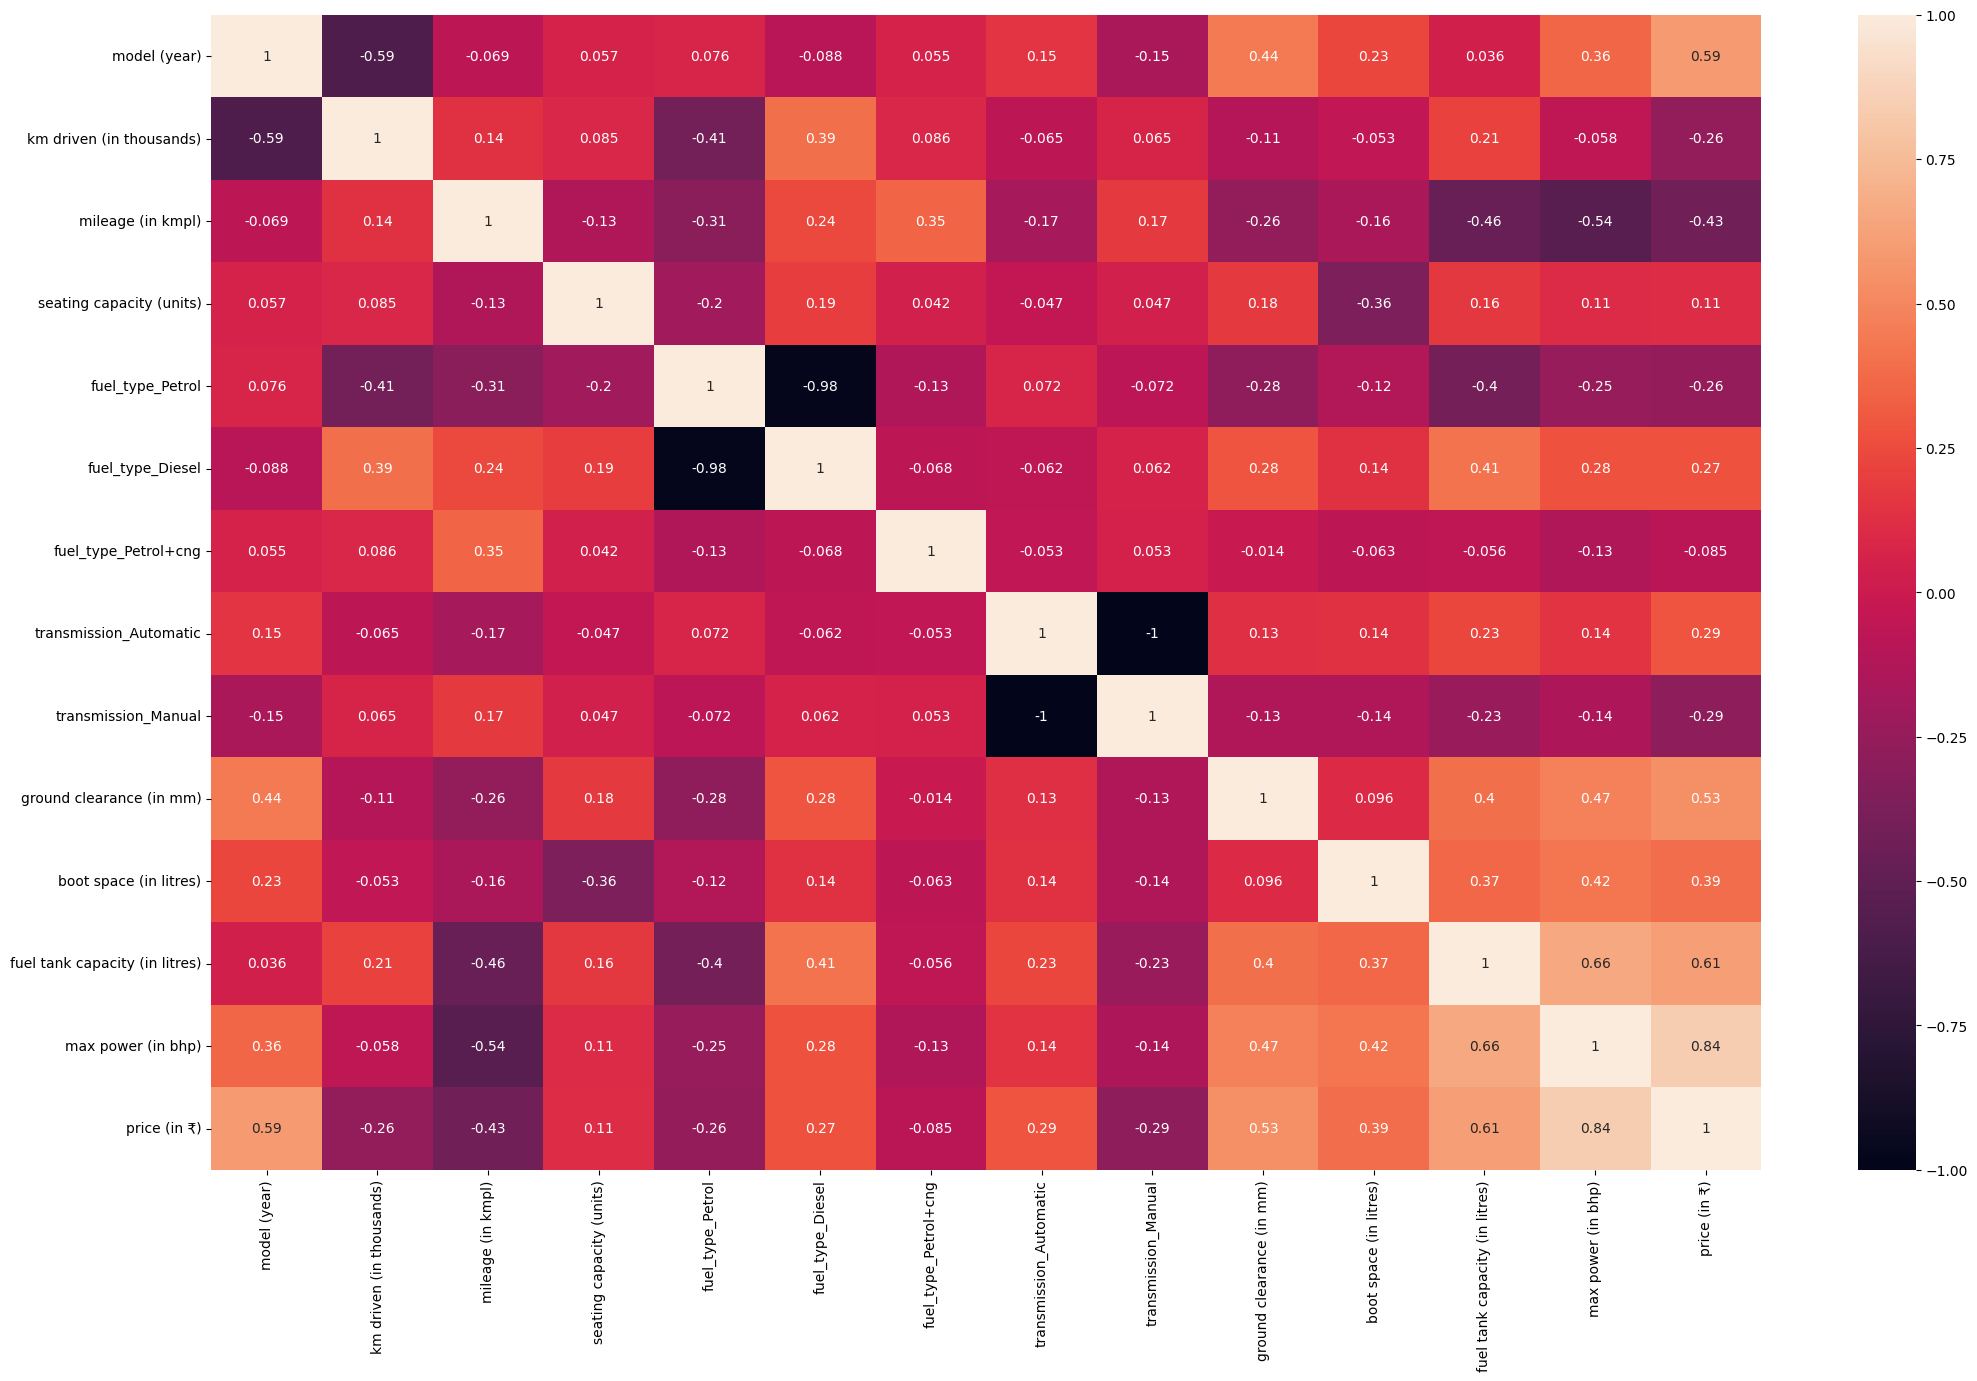

In [84]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(), annot=True)

# MODEL PREPARATION

In [85]:
x = df.drop('price (in ₹)', axis=1)
y = df['price (in ₹)']

In [86]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)

In [87]:
lr = LinearRegression()

In [88]:
lr.fit(x_train, y_train)

LinearRegression()

In [89]:
y_pred = lr.predict(x_test)

In [90]:
lr.coef_

array([ 0.47695093, -0.02413339, -0.10376618, -0.20687218, -1.03657711,
        0.64160949,  0.39496763,  0.62256714, -0.62256714, -0.00566288,
       -0.00171559,  0.09427588,  0.07990158])

In [91]:
lr.intercept_

-959.361595602704

### EVALUATING THE MODEL

In [92]:
r2_score = metrics.r2_score(y_test, y_pred)
r2_score

0.8411607398365913

Adjusted R² = 1 - [(1 - R²) * (n - 1) / (n - p - 1)]

Where:

* R² is the regular R-squared score
* n refers to the number of observations in the training dataset
* p represents the number of predictors or independent variables in the model

In [93]:
n = x_train.shape[0]
n

842

In [94]:
p = x_train.shape[1]
p

13

In [95]:
adjusted_r2_score = 1 - ((1 - r2_score)*(n-1)/(n-p-1))
adjusted_r2_score

0.8386668867180838

## OUR MODEL IS PERFORMING VERY WELL! HURREY!!!

### PREDICTING PRICE OF A USED CAR BASED ON INPUTS PROVIDED AS A BUYER

In [96]:
df.head(1)

,model (year),km driven (in thousands),mileage (in kmpl),seating capacity (units),fuel_type_Petrol,fuel_type_Diesel,fuel_type_Petrol+cng,transmission_Automatic,transmission_Manual,ground clearance (in mm),boot space (in litres),fuel tank capacity (in litres),max power (in bhp),price (in ₹)
0,2019,38,17.0,5,0,1,0,0,1,205,425,50,138.0,15.65


## Predicting price of a used car having:
* model (year) = 2016
* km driven (in thousands) = not more than 60k
* mileage (in kmpl) = at least 18 kmpl
* seating capacity (units) = 5
* fuel_type_ Petrol = yes
* fuel_type_ Diesel = no
* fuel_type_ Petrol+cng = no
* transmission_ Automatic = no
* transmission_ Manual = yes
* ground clearance (in mm) = not less than 180 mm
* boot space (in litres) = at least 350 litres
* fuel tank capacity (in litres) = 35 litres is enough
* max power (in bhp) = 120 bhp

In [97]:
lr.predict([[2016,60,18,5,1,0,0,0,1,190,350,35,120]])

C:\Users\R\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([7.37362618])

A used car having the above desired features and details will cost a buyer around ₹7.3 lakhs.

### This model can also be used by sellers (1st/2nd/3rd owners) to get an idea of prices they can expect

# _______________________________________THANKS___________________